### Импорт библиотек

In [8]:
import numpy as np
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import cv2
import albumentations as albu

from tqdm import tqdm
from sklearn.model_selection import train_test_split

from preprocessing.DateCategories import balance_ultra_data
from datasets import UltravioletDataset
from tools import train_model, IoU, pixel_accuracy

# torch.cuda.empty_cache()
# torch.manual_seed(41)
# np.random.seed(41)
# torch.backends.cudnn.deterministic = True
# torch.cuda.manual_seed(41)

### Пути 

In [9]:
IMAGE_PATH = 'C:/Users/tolik/information_technology/third_year/practice_project/CoreAnalysis-ML/data_for_study/photos/'
ULTRA_MASK_PATH = 'C:/Users/tolik/information_technology/third_year/practice_project/CoreAnalysis-ML/data_for_study/labels/ultraviolet/label_'

### Подготовка данных

In [10]:
# разобьем все изображения на тренировочную, тестовую, валидационную части
X_train, X_test = train_test_split(balance_ultra_data, test_size = 0.102, random_state = 19)
X_train, X_val = train_test_split(X_train, test_size = 0.203, random_state = 19)

print('Размер X_train: {}\n'
      'Размер X_test: {}\n'
      'Размер X_val: {}'
      .format(len(X_train), len(X_test), len(X_val)))

Размер X_train: 140
Размер X_test: 21
Размер X_val: 36


### Аугментации

In [23]:
augment_1 = albu.Compose([
    albu.HorizontalFlip(),
    albu.VerticalFlip(),
    albu.RandomRotate90(),
    albu.Transpose(),
    albu.RandomGamma(),
])

### Датасеты (train, val, test)

In [24]:
train_set = UltravioletDataset(img_path = IMAGE_PATH,
                               mask_path = ULTRA_MASK_PATH,
                               data = X_train,
                               res = [768, 512],
                               augmentation=augment_1)
val_set = UltravioletDataset(img_path = IMAGE_PATH,
                             mask_path = ULTRA_MASK_PATH,
                             res = [768, 512],
                             data = X_val)
test_set = UltravioletDataset(img_path = IMAGE_PATH,
                              mask_path = ULTRA_MASK_PATH,
                              res = [768, 512],
                              data = X_test)

In [25]:
# Загрузчики данных
train_dataloader = DataLoader(dataset=train_set,
                              batch_size=7,
                              shuffle=True)
val_dataloader = DataLoader(dataset=val_set,
                              batch_size=6,
                              shuffle=False)
test_dataloader = DataLoader(dataset=test_set,
                            batch_size=3,
                            shuffle=False)

### Импорт модели, гиперпараметры

In [ ]:
import segmentation_models_pytorch as smp
model = smp.DeepLabV3Plus(encoder_name='resnet18', encoder_depth=5, encoder_weights='imagenet',
                          encoder_output_stride=8,
                          decoder_channels=256, decoder_atrous_rates=(6, 12, 24),
                          in_channels=3, classes=3)

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr = 1.0e-3, weight_decay=1.0e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma = 0.01)
loss = torch.nn.CrossEntropyLoss()

### Обучение

In [30]:
history = train_model(model = model, N_classes = 3, model_name = 'DeepLabV3Plus_resnet18_ultraviolet',
                optimizer = optimizer, scheduler = scheduler, loss = loss,
                train_dl = train_dataloader, val_dl = val_dataloader, num_epochs = 20)

### interrupted

Epoch № 1


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

train-loss: 0.6847596943378449
train-accuracy: 0.7249660491943359
train-iou: 0.5478460203565335


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:33<00:00,  5.60s/it]

validation-loss: 0.64452263712883
validation-accuracy: 0.7260474452265986
validation-iou: 0.5555295412576621
saving model ...
Epoch № 2



  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

train-loss: 0.7850965023040771
train-accuracy: 0.6943440755208333
train-iou: 0.5227772606675302


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:29<00:00,  4.93s/it]

validation-loss: 0.6442917287349701
validation-accuracy: 0.716840320163303
validation-iou: 0.5451524619516397
Epoch № 3



  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

train-loss: 0.8681489050388336
train-accuracy: 0.6594266074044365
train-iou: 0.4769625151885012


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:29<00:00,  4.85s/it]

validation-loss: 0.6420390705267588
validation-accuracy: 0.728779121681496
validation-iou: 0.5594655328023312
saving model ...
Epoch № 4



  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

train-loss: 0.7552842140197754
train-accuracy: 0.7000239236014232
train-iou: 0.5337374939133106


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:26<00:00,  4.47s/it]

validation-loss: 0.648978461821874
validation-accuracy: 0.7234805778220849
validation-iou: 0.5530579032805131
Epoch № 5



  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

train-loss: 0.7390642508864402
train-accuracy: 0.6945075080508276
train-iou: 0.5297124979751728


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:28<00:00,  4.83s/it]

validation-loss: 0.6652349829673767
validation-accuracy: 0.7101783046015986
validation-iou: 0.5398879354074199
Epoch № 6



  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

train-loss: 0.6987517952919007
train-accuracy: 0.7106558663504464
train-iou: 0.5369699532638548


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:27<00:00,  4.56s/it]

validation-loss: 0.6484071711699168
validation-accuracy: 0.7268271269621672
validation-iou: 0.5600359381324932
saving model ...
Epoch № 7



  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

train-loss: 0.7478632882237435
train-accuracy: 0.7048898424421036
train-iou: 0.5405032901394565


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:26<00:00,  4.41s/it]

validation-loss: 0.6606637636820475
validation-accuracy: 0.7061680687798394
validation-iou: 0.5346628742354642
Epoch № 8



  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

train-loss: 0.7496791690587997
train-accuracy: 0.7027051653180802
train-iou: 0.5346005266846624


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:26<00:00,  4.43s/it]

validation-loss: 0.6546327968438467
validation-accuracy: 0.7272694199173539
validation-iou: 0.56093351404261
saving model ...
Epoch № 9



  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

train-loss: 0.7751196801662446
train-accuracy: 0.7096439543224518
train-iou: 0.5414195727358956


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:26<00:00,  4.38s/it]

validation-loss: 0.6296886305014292
validation-accuracy: 0.7360353116635924
validation-iou: 0.5656374226529248
saving model ...
Epoch № 10



  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

train-loss: 0.7343569591641426
train-accuracy: 0.7205869583856491
train-iou: 0.5593207947981469


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:26<00:00,  4.43s/it]

validation-loss: 0.6303820212682089
validation-accuracy: 0.7303926679823133
validation-iou: 0.5576124822942087
Epoch № 11



  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

train-loss: 0.7267834588885307
train-accuracy: 0.720160638718378
train-iou: 0.5578069185716122


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:26<00:00,  4.50s/it]

validation-loss: 0.6430899898211161
validation-accuracy: 0.7497984568277994
validation-iou: 0.5806250991404133
saving model ...
Epoch № 12



  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

train-loss: 0.7406901389360427
train-accuracy: 0.7060202643984841
train-iou: 0.5353760151666437


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:26<00:00,  4.48s/it]

validation-loss: 0.6440632144610087
validation-accuracy: 0.7319076679371022
validation-iou: 0.5654839959047769
Epoch № 13



  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

train-loss: 0.7396103650331497
train-accuracy: 0.7105249859037854
train-iou: 0.5379203471004856


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:26<00:00,  4.50s/it]

validation-loss: 0.6295017103354136
validation-accuracy: 0.7467880249023438
validation-iou: 0.5822605896493754
saving model ...
Epoch № 14



  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

train-loss: 0.7895929008722306
train-accuracy: 0.6621858505975633
train-iou: 0.48862636799272136


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:26<00:00,  4.45s/it]

validation-loss: 0.6419960459073385
validation-accuracy: 0.7346426645914713
validation-iou: 0.5688370393383536
Epoch № 15



  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

train-loss: 0.7139910668134689
train-accuracy: 0.7184380304245721
train-iou: 0.542258816196967


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:26<00:00,  4.43s/it]

validation-loss: 0.644719272851944
validation-accuracy: 0.7240094078911675
validation-iou: 0.553519009609279
Epoch № 16



  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

train-loss: 0.8235213622450829
train-accuracy: 0.6633771623883928
train-iou: 0.49897708379308836


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:26<00:00,  4.47s/it]

validation-loss: 0.6809001962343851
validation-accuracy: 0.6791987948947482
validation-iou: 0.5046483306182115
Epoch № 17



  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

train-loss: 0.6985174462199211
train-accuracy: 0.7114568982805525
train-iou: 0.539524929958997


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:26<00:00,  4.44s/it]

validation-loss: 0.6728025476137797
validation-accuracy: 0.68741007204409
validation-iou: 0.5137788326162951
Epoch № 18



  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

train-loss: 0.6647556096315383
train-accuracy: 0.7373870667957123
train-iou: 0.5758208199300829


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:26<00:00,  4.39s/it]

validation-loss: 0.6441867649555206
validation-accuracy: 0.7429223943639686
validation-iou: 0.5814779616852068
Epoch № 19



  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

train-loss: 0.7342377156019211
train-accuracy: 0.6970720926920573
train-iou: 0.5219451673934213


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:27<00:00,  4.63s/it]

validation-loss: 0.6281555493672689
validation-accuracy: 0.7546685536702474
validation-iou: 0.5946792542266056
saving model ...
Epoch № 20



  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

train-loss: 0.7017125189304352
train-accuracy: 0.7376955486479262
train-iou: 0.5789878296306183


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:26<00:00,  4.50s/it]

validation-loss: 0.6495725512504578
validation-accuracy: 0.7336064797860603
validation-iou: 0.5689698957409864


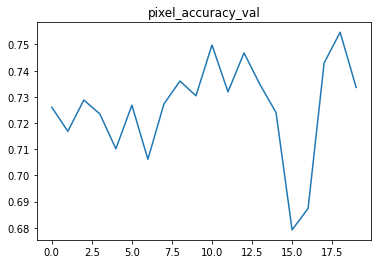

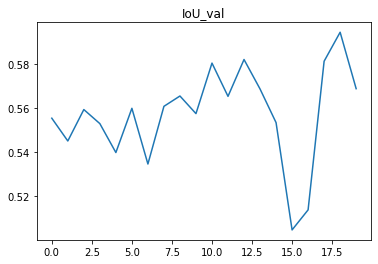

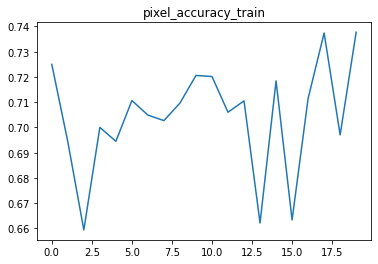

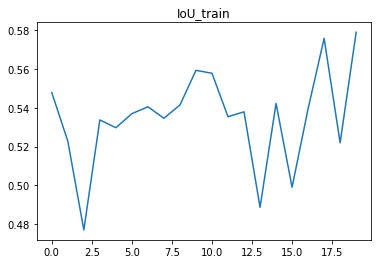

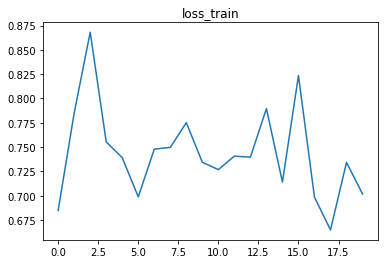

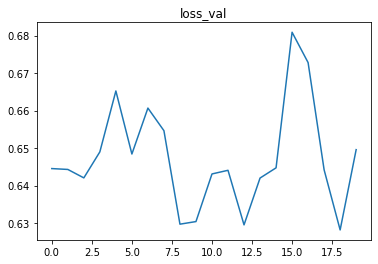

In [34]:
for key in history.keys():
    plt.plot(np.arange(20), history[key])
    plt.title(key)
    plt.pause(0.001)

### Тестирование обученной модели

In [13]:
best_model_deeplab = torch.load('DeepLabV3Plus_resnet18_ultraviolet.pth')

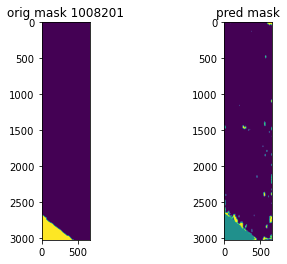

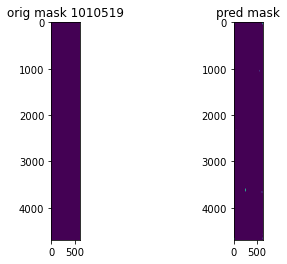

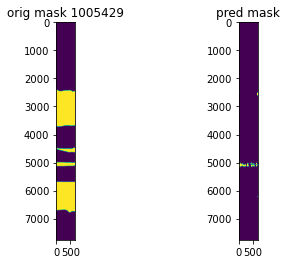

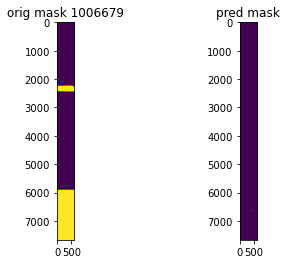

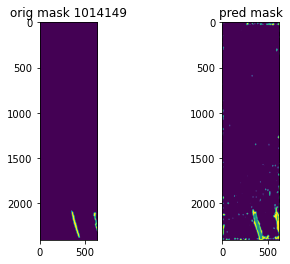

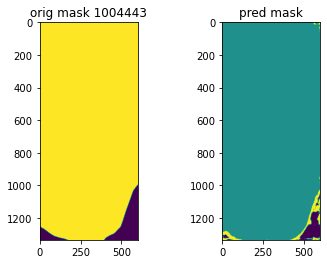

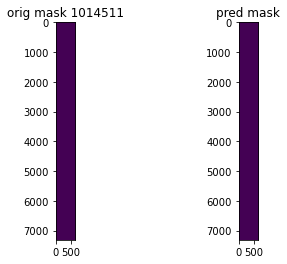

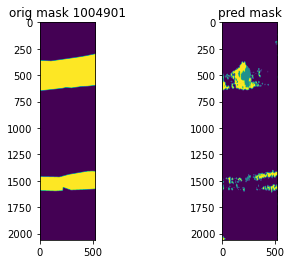

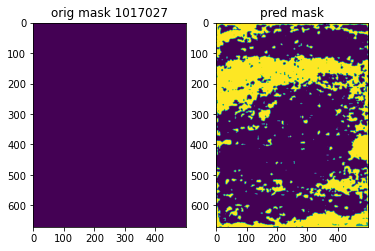

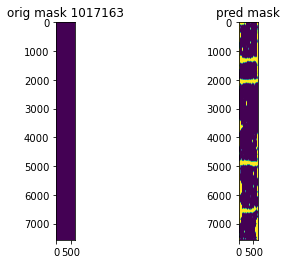

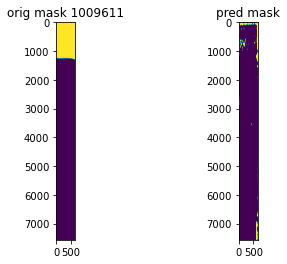

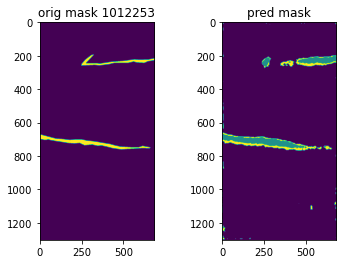

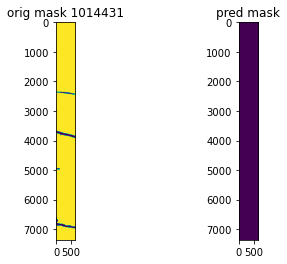

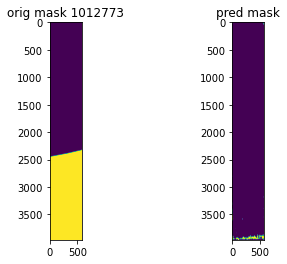

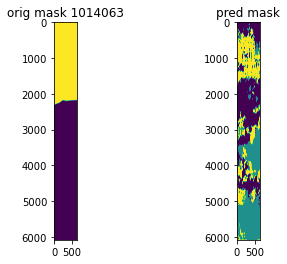

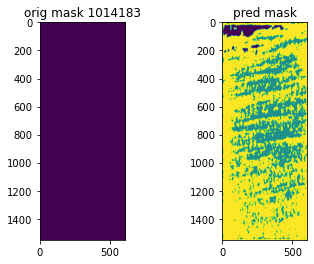

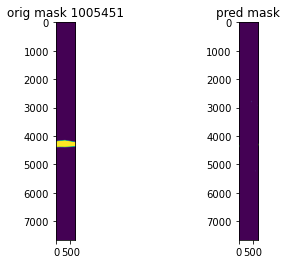

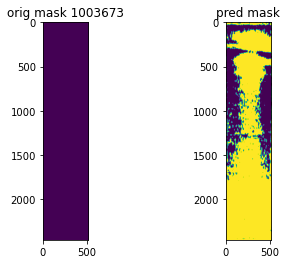

In [ ]:
from PIL import Image
from tools import prediction, model_predict
PATH = 'C:/Users/tolik/information_technology/third_year/practice_project/CoreAnalysis-ML/data_for_study/predict'

for id in X_test:
    img = Image.open(f'C:/Users/tolik/information_technology/third_year/practice_project/CoreAnalysis-ML/data_for_study/photos/{id}.jpeg')
    pred = model_predict(best_model_deeplab, img)
    prediction(best_model_deeplab, img, format='ultra',
               path=PATH,
               img_id=str(id))
    orig_mask = np.load(f'C:/Users/tolik/information_technology/third_year/practice_project/CoreAnalysis-ML/data_for_study/labels/ultraviolet/label_{id}.npz')['x']
    ax1 = plt.subplot(121)
    plt.imshow(orig_mask)
    ax1.set_title(f'orig mask {id}')
    
    ax2 = plt.subplot(122)
    plt.imshow(pred)
    ax2.set_title('pred mask')
    
    plt.pause(0.001)

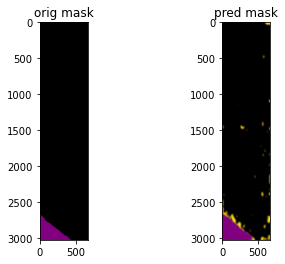

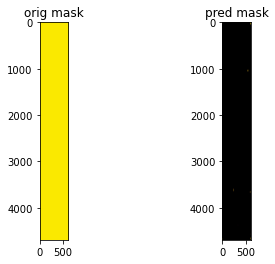

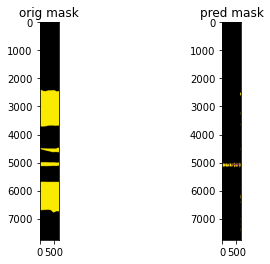

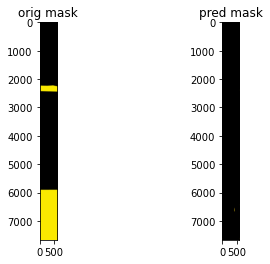

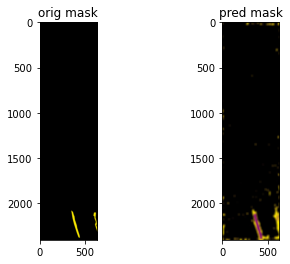

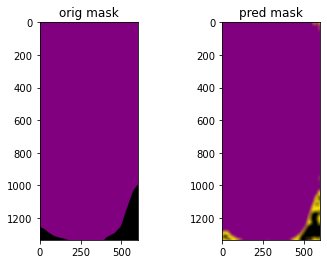

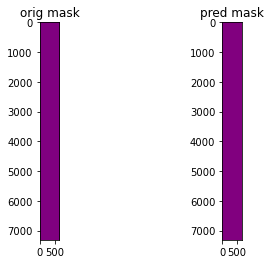

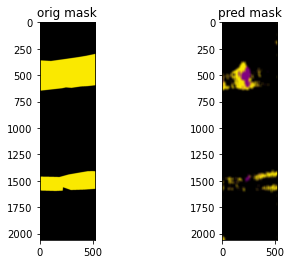

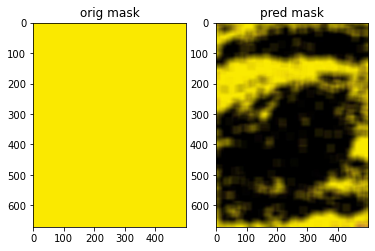

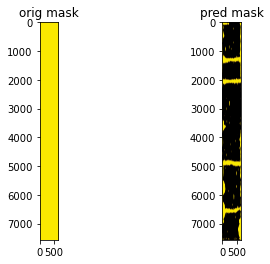

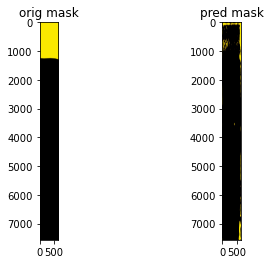

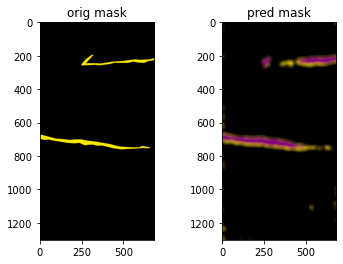

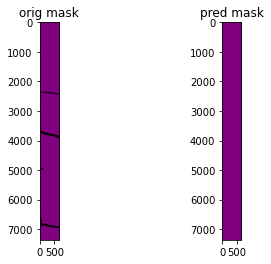

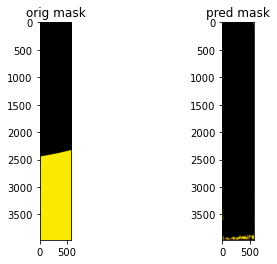

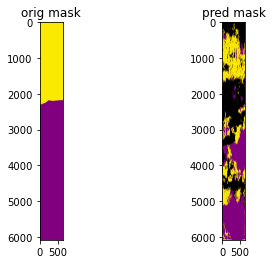

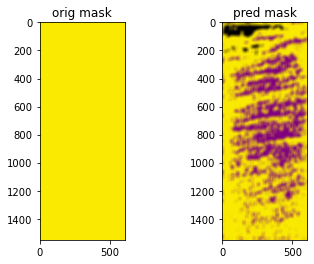

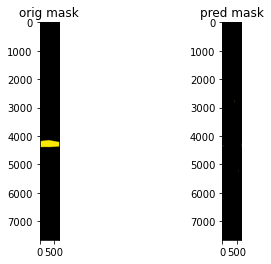

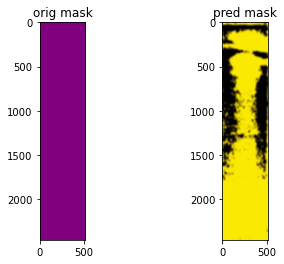

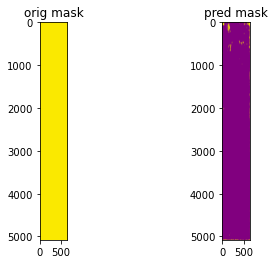

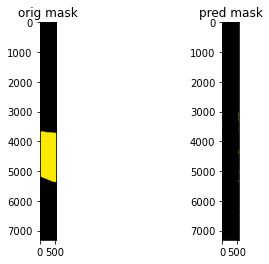

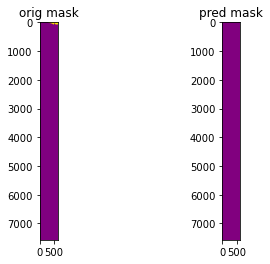

In [7]:
### mask in rgb

for id in X_test:
    orig_mask = Image.open(f'C:/Users/tolik/information_technology/third_year/practice_project/CoreAnalysis-ML/data_for_study/labels_png/ultraviolet/label_{id}.png')
    
    ax1 = plt.subplot(121)
    plt.imshow(orig_mask)
    ax1.set_title(f'orig mask {id}')
    
    pred = Image.open(f'C:/Users/tolik/information_technology/third_year/practice_project/CoreAnalysis-ML/data_for_study/predict/ultra/{id}.jpg')
    ax2 = plt.subplot(122)
    plt.imshow(pred)
    ax2.set_title('pred mask')
    
    plt.pause(0.001)